# Customer Credit Scores Analysis

# 1.0 Background

According to https://www.businessinsider.com/personal-finance/average-credit-score?r=US&IR=T, the average credit score in the US is a 714, based on FICO data provided by credit reporting company Experian. Credit scores, which are like a grade for your borrowing history, fall in the range of 300 to 850. The higher your score, the better, the report further states.

FICO is the acronym for Fair Isaac Corporation, as well as the name for the credit scoring model that Fair Isaac Corporation developed. A FICO credit score is a tool used by many lenders to determine if a person qualifies for a credit card, mortgage, or other loan.

Investopedia (https://www.investopedia.com/terms/c/credit_score.aspA) states that credit score is based on your credit history, which includes information like the number accounts, total levels of debt, repayment history, and other factors. Lenders use credit scores to evaluate your credit worthiness, or the likelihood that you will repay loans in a timely manner.

# Data Source

The data set used to calculate FICO customer scores i.e. Credit Card Customers Prediction contains 10,127 entries entries with 23 columns obtained from Kaggle.

The data used includes comprehensive demographic details such as age, gender, marital status and income category, as well as insight into each customer’s relationship with the credit card provider such as the card type, number of months on book and inactive periods. Additionally it holds key data about customers’ spending behavior drawing closer to their churn decision such as total revolving balance, credit limit, average open to buy rate and analyzable metrics like total amount of change from quarter 4 to quarter 1, and average utilization ratio.

The data set is available here; https://www.kaggle.com/datasets/whenamancodes/credit-card-customers-prediction or https://leaps.analyttica.com/home.

# 2.0 Objectives

The objectives of the analysis are as follows;

1. To explore the distribution and attributes of the customer features via a variety of data visualisations.

2. To calculate the customers' FICO scores.

3. To illustrate the relationship between the income category and the FICO Scores.

# 3.0 Data

In [4]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [125]:
# Loading the data set
cdata = pd.read_csv("C:/Users/kinyanjuim/Desktop/H2_Projects_2023/Customer_Credit_Score/Customer-Credit-Scores/BankChurners.csv")

In [126]:
# Overview of the carddata columns
print(cdata.columns)

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')


In [127]:
# Information about attributes
cdata.info()

# All columns have the right data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [9]:
# First 5 rows of the dataset
cdata.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [10]:
# Checking for duplicates
cdata['CLIENTNUM'].nunique()

# We have no duplicates in the data

10127

In [12]:
# Checking for missing values

missing = cdata.isnull().sum()
missing

# No missing data. Data is clean

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [82]:
# An overview of count for the categorical columns

# Count per Gender
a = cdata['Gender'].value_counts()
# Count per education level
b = cdata['Education_Level'].value_counts()
# Count per mariral status
c = cdata['Marital_Status'].value_counts()
# Count per income category
d = cdata['Income_Category'].value_counts()
# Count per card category
e = cdata['Card_Category'].value_counts()
# Count per account closure/ open
f = cdata['Attrition_Flag'].value_counts()

print('\n',a,'\n\n', b,'\n\n',c,'\n\n',d,'\n\n',e, 'n\n', f)


 F    5358
M    4769
Name: Gender, dtype: int64 

 Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64 

 Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64 

 Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64 

 Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64 n
 Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64


In [128]:
# Omitting variables we won't use in this analysis
cdata.drop(columns = ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                      'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
                      axis =1, inplace = True)
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

# 4.0 Exploratory Data Analysis

## a) Distribution of Average Credit Utilization Ratio

Credit utilization is a measure of how much of your available credit you're using. If your credit utilisation ratio is 50%, it means you're using half of the total credit available for you.

Because a high utilization rate could indicate you'll have trouble paying your bills on time, a lower utilization rate is generally best for your credit scores.

According to Experian, one of the three major credit monitoring bureaus in US, a good credit utilization ratio should be kept under 30%. 

So, say if you have Kshs 100,000 in credit, your balance shouldn't exceed Kshs.30,000.

In [36]:
# Creating a column of the utilization ratio converted to 100%

cdata['Avg_Ratio_in%'] = cdata['Avg_Utilization_Ratio']*100

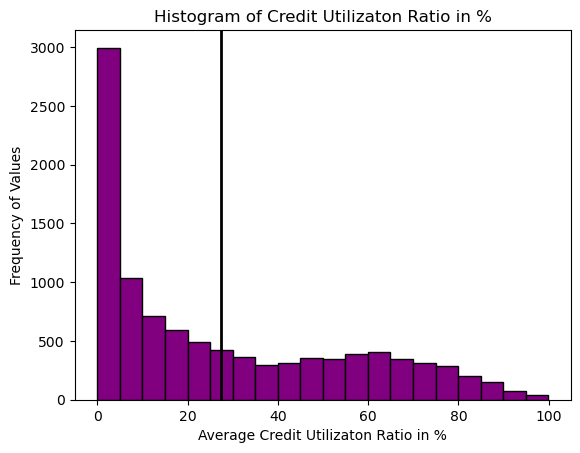

In [37]:
# Histogram indcating distribution of Avg_Utilization_Ratio in %

plt.hist(cdata['Avg_Ratio_in%'], bins = 20, color = "purple", edgecolor = 'black')

plt.xlabel('Average Credit Utilizaton Ratio in %')
plt.ylabel('Frequency of Values')
plt.title('Histogram of Credit Utilizaton Ratio in %')

# Mean of Income
plt.axvline(cdata['Avg_Ratio_in%'].mean(), color = "black", linewidth = 2)
plt.show()

# The data is positively skewed


## b) Credit Limit

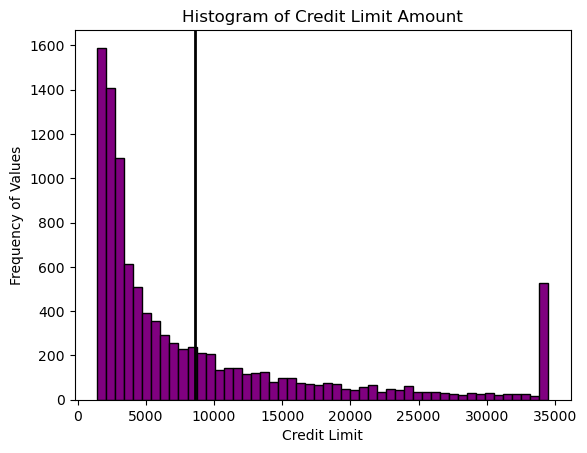

In [38]:
# Histogram indcating distribution of credit limit on credit card

plt.hist(cdata['Credit_Limit'], bins = 50, color = "purple", edgecolor = 'black')

plt.xlabel('Credit Limit')
plt.ylabel('Frequency of Values')
plt.title('Histogram of Credit Limit Amount')

# Mean of Income
plt.axvline(cdata['Credit_Limit'].mean(), color = "black", linewidth = 2)
plt.show()

# The data is positively skewed with an outlier at the credit limit of 35,000

## c) Total Revolving Balance

If you don’t pay off your revolving credit balance in full each month, the unpaid portion carries over to the next month. That’s your revolving balance. High revolving balances may indicate that a borrower is relying too much on credit. That is why it is important to keep revolving balances to a minimum. 

A revolving balance accrues interest, which is why some smart credit card users pay off their statement balances every month, never paying interest.Revolving credit accounts are open-ended debt, meaning they have no expiration date and remain open as long as the account is in good standing.

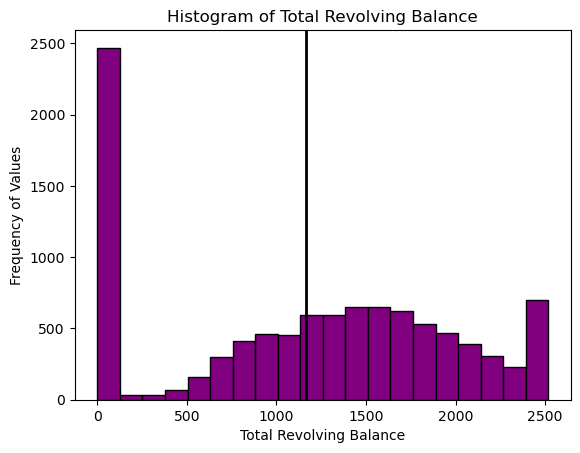

In [39]:
# Histogram indcating distribution of total revolving balance

plt.hist(cdata['Total_Revolving_Bal'], bins = 20, color = "purple", edgecolor = 'black')

plt.xlabel('Total Revolving Balance')
plt.ylabel('Frequency of Values')
plt.title('Histogram of Total Revolving Balance')

# Mean of Income
plt.axvline(cdata['Total_Revolving_Bal'].mean(), color = "black", linewidth = 2)
plt.show()

# The data is seems to be normally distributed with outliers of balances of 0-120 and 2380 - 2500

# 5.0 Exploring Correlations in the Dataset

In [41]:
# Correlations
cormat = cdata.corr()
round(cormat,2)

C:\Users\kinyanjuim\AppData\Local\Temp\ipykernel_14468\1977068519.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormat = cdata.corr()


,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Avg_Ratio_in%
CLIENTNUM,1.00,0.01,0.01,0.13,0.01,0.01,0.01,0.01,0.00,0.01,0.02,-0.02,-0.00,0.01,0.00,0.00
Customer_Age,0.01,1.00,-0.12,0.79,-0.01,0.05,-0.02,0.00,0.01,0.00,-0.06,-0.05,-0.07,-0.01,0.01,0.01
Dependent_count,0.01,-0.12,1.00,-0.10,-0.04,-0.01,-0.04,0.07,-0.00,0.07,-0.04,0.03,0.05,0.01,-0.04,-0.04
Months_on_book,0.13,0.79,-0.10,1.00,-0.01,0.07,-0.01,0.01,0.01,0.01,-0.05,-0.04,-0.05,-0.01,-0.01,-0.01
Total_Relationship_Count,0.01,-0.01,-0.04,-0.01,1.00,-0.00,0.06,-0.07,0.01,-0.07,0.05,-0.35,-0.24,0.04,0.07,0.07
Months_Inactive_12_mon,0.01,0.05,-0.01,0.07,-0.00,1.00,0.03,-0.02,-0.04,-0.02,-0.03,-0.04,-0.04,-0.04,-0.01,-0.01
Contacts_Count_12_mon,0.01,-0.02,-0.04,-0.01,0.06,0.03,1.00,0.02,-0.05,0.03,-0.02,-0.11,-0.15,-0.09,-0.06,-0.06
Credit_Limit,0.01,0.00,0.07,0.01,-0.07,-0.02,0.02,1.00,0.04,1.00,0.01,0.17,0.08,-0.00,-0.48,-0.48
Total_Revolving_Bal,0.00,0.01,-0.00,0.01,0.01,-0.04,-0.05,0.04,1.00,-0.05,0.06,0.06,0.06,0.09,0.62,0.62
Avg_Open_To_Buy,0.01,0.00,0.07,0.01,-0.07,-0.02,0.03,1.00,-0.05,1.00,0.01,0.17,0.07,-0.01,-0.54,-0.54


<Axes: >

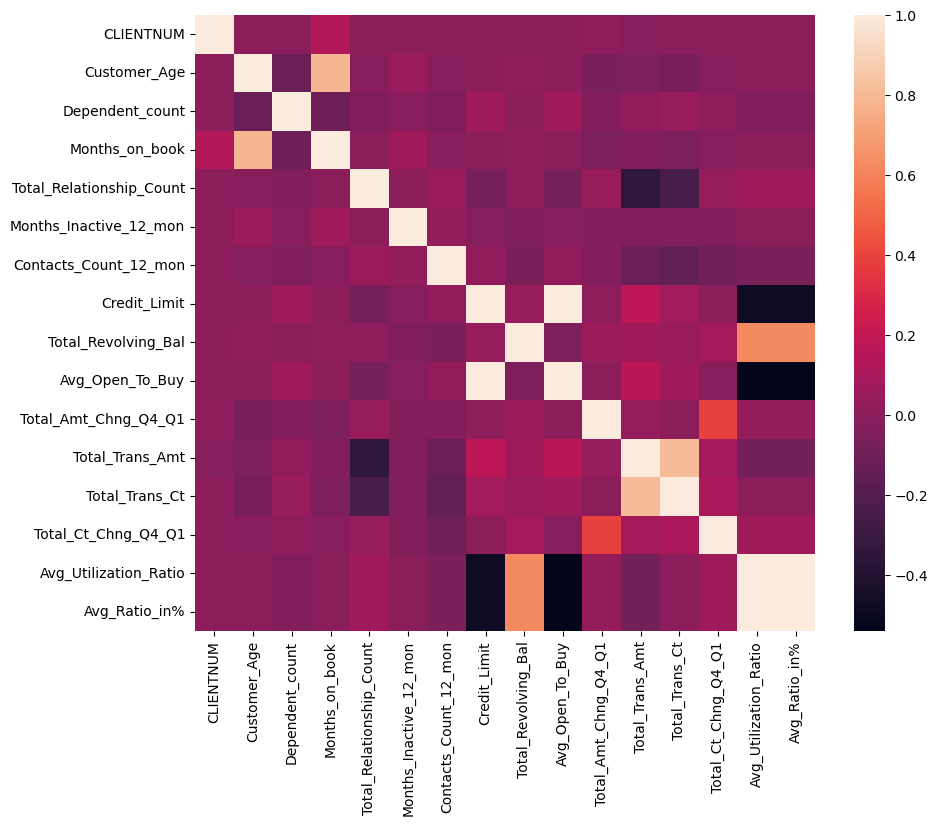

In [45]:
# Correlation matrix

plt.figure(figsize=(10,8)) #Enlarges the graph, omit code also to see difference
sns.heatmap(cormat)

Most Positive - strong correlation between cutomer age and Period of relationship with bank at 0.79
Most negative correlation between credit limit and utilization ratio at -0.48. The lower the credit limit, the higher the credit utilization ratio.

## a) Scatter Plot of Average Credit Utilization Ratio vs Credit Limit

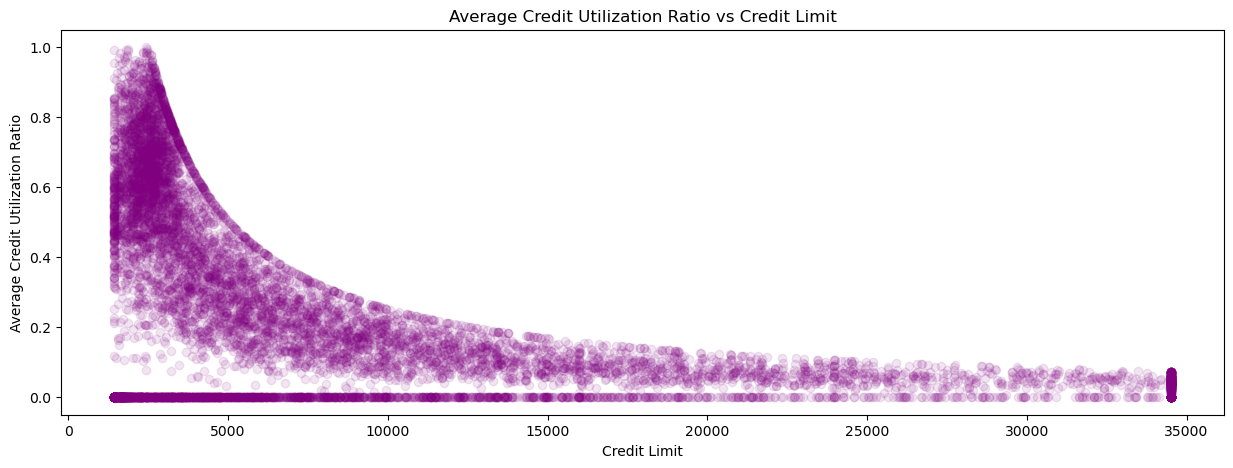

In [48]:
# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(cdata["Credit_Limit"], cdata["Avg_Utilization_Ratio"], alpha=0.1, color="purple")
ax.set_title("Average Credit Utilization Ratio vs Credit Limit")
ax.set_xlabel("Credit Limit")
ax.set_ylabel("Average Credit Utilization Ratio");

# Confirms the negative correlation

There seems to be a negative relationship between the average credit utilization ratio and the credit limit; whereby as the average credit utilization ratio increases,the credit limit decreases and vice versa.

## b) Bar Plot

In [79]:
# Average number of products per income category
cdata.groupby('Income_Category')['Total_Relationship_Count'].mean()

Income_Category
$120K +           3.778542
$40K - $60K       3.783240
$60K - $80K       3.833809
$80K - $120K      3.816938
Less than $40K    3.823364
Unknown           3.814748
Name: Total_Relationship_Count, dtype: float64

In [80]:
# Average number of products per card category
cdata.groupby('Card_Category')['Total_Relationship_Count'].mean()

Card_Category
Blue        3.848665
Gold        3.008621
Platinum    2.300000
Silver      3.421622
Name: Total_Relationship_Count, dtype: float64

Text(0.5, 1.0, 'Total Revolving Balance per Education LeveL, Separated by Gender')

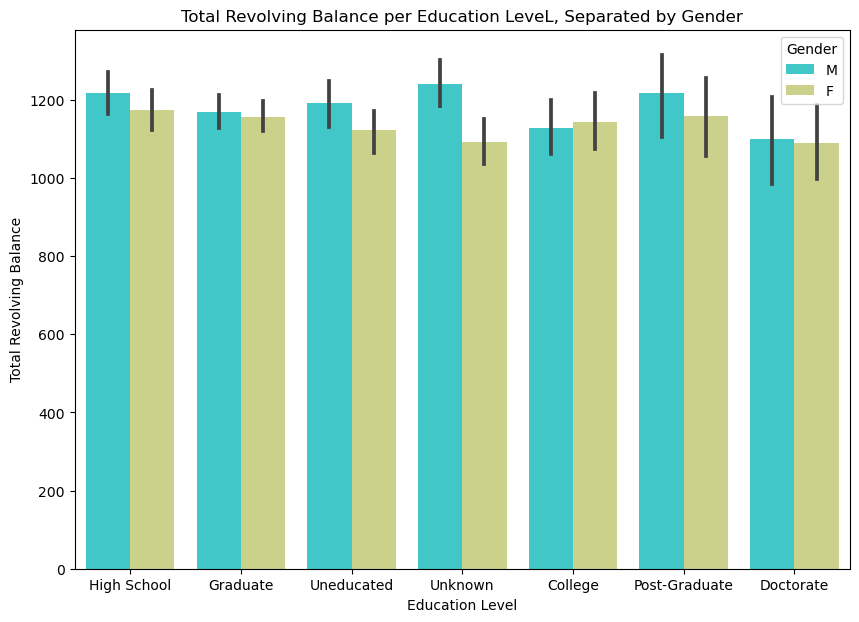

In [91]:
plt.figure(figsize=(10,7))
sns.barplot(x='Education_Level',y='Total_Revolving_Bal',data=cdata, palette='rainbow', hue = 'Gender')
plt.xlabel("Education Level")
plt.ylabel("Total Revolving Balance")
plt.title("Total Revolving Balance per Education LeveL, Separated by Gender")

Men generally have higher revolving balances per education level with the highest being at Post-Graduate and the lowest at Graduate.

# 5.0 FICO Score

FICO incorporates five major components, with varying levels of importance. These categories with their relative weights are:

a)Payment history (35%). This shows whether one makes payments on time.

b)Amount owed (30%). This is based on the entore amount you owe, the number and types of accounts you have, and the amount of money owed compared to how much credit you have available.

c)Length of credit history (15%). The longer your history of making timely paymemts, the higher your score will be.

d)New credit (10%). Recent account activity is considered here i.e. if you've opened a lot of accounts recently or applied to open accounts, it may suggest potential financial trouble.

e)Credit mix (10%). A variety of credit types shows lenders you can manage various types of credit. It can include installment revolving credit.


In [129]:
# Calculate credit scores using the complete FICO formula
# Define the mapping for categorical features
cdata['Attrition_Flag'] = cdata['Attrition_Flag'].astype('category')

attrition_level_mapping = {'Existing Customer': 0, 'Attrited Customer': 1}
attrition_level_mapping

# Apply mapping to categorical features
cdata['Attrition_Flag'] = cdata['Attrition_Flag'].map(attrition_level_mapping)

print(cdata.head())

   CLIENTNUM  Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383               0            45      M                3   
1  818770008               0            49      F                5   
2  713982108               0            51      M                3   
3  769911858               0            40      F                4   
4  709106358               0            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...              

In [140]:
credit_scores = []

for index, row in cdata.iterrows():
    payment_history = row['Total_Revolving_Bal']
    credit_utilization_ratio = row['Avg_Utilization_Ratio']
    length_credit = row['Months_on_book']
    open_to_buy = row['Avg_Open_To_Buy']
    credit_mix = row['Total_Relationship_Count']

    # Apply the FICO formula to calculate the credit score
    credit_score = (payment_history * 0.35) + (credit_utilization_ratio * 0.30) + (length_credit * 0.15) + (open_to_buy * 0.10) + (credit_mix * 0.10)
    credit_scores.append(credit_score)

# Add the credit scores as a new column to the DataFrame
cdata['Credit Score'] = credit_scores

print(cdata.head())

   CLIENTNUM  Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383               0            45      M                3   
1  818770008               0            49      F                5   
2  713982108               0            51      M                3   
3  769911858               0            40      F                4   
4  709106358               0            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Contacts_Count_12_mon  Credit_Limit  \
0              39  ...                      3       12691.0   
1              44  ...                      2        825

In [141]:
# Overview of above results
a= cdata['Credit Score'].min()
b= cdata['Credit Score'].max()
print(a,b)

146.28 4089.7219


In [142]:
# Filter the data where the FICO score range applies
ficoscore = cdata[(cdata['Credit Score'] >= 300) & (cdata['Credit Score'] <= 850)]
ficoscore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4106 entries, 2 to 10125
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 4106 non-null   int64  
 1   Attrition_Flag            4106 non-null   int64  
 2   Customer_Age              4106 non-null   int64  
 3   Gender                    4106 non-null   object 
 4   Dependent_count           4106 non-null   int64  
 5   Education_Level           4106 non-null   object 
 6   Marital_Status            4106 non-null   object 
 7   Income_Category           4106 non-null   object 
 8   Card_Category             4106 non-null   object 
 9   Months_on_book            4106 non-null   int64  
 10  Total_Relationship_Count  4106 non-null   int64  
 11  Months_Inactive_12_mon    4106 non-null   int64  
 12  Contacts_Count_12_mon     4106 non-null   int64  
 13  Credit_Limit              4106 non-null   float64
 14  Total_R

In [143]:
ficoscore['Income_Category'].value_counts()

Less than $40K    2007
$40K - $60K        877
$60K - $80K        422
Unknown            396
$80K - $120K       302
$120K +            102
Name: Income_Category, dtype: int64

In [144]:
# What is the relationship between Income Category and FICO scores
# Create pandas DataFrame Subset Based on Logical Condition; leave out unknown category

less40k = ficoscore.loc[ficoscore['Income_Category'] == 'Less than $40K']
print(less40k)

k40kto60k = ficoscore.loc[ficoscore['Income_Category'] == '$40K - $60K']
print(k40kto60k)

k60kto80k = ficoscore.loc[ficoscore['Income_Category'] == '$60K - $80K']
print(k60kto80k)

k80kto120k = ficoscore.loc[ficoscore['Income_Category'] == '$80K - $120K']
print(k80kto120k)

k120K = ficoscore.loc[ficoscore['Income_Category'] == '$120K +']
print(k120K)

       CLIENTNUM  Attrition_Flag  Customer_Age Gender  Dependent_count  \
14     712396908               0            57      F                2   
23     811604133               0            47      F                4   
33     788658483               0            53      F                2   
35     715318008               0            55      F                1   
50     720756708               0            52      F                3   
...          ...             ...           ...    ...              ...   
10106  717494358               0            58      F                0   
10109  780613758               0            47      M                5   
10114  720841533               0            29      M                0   
10121  713899383               0            56      F                1   
10124  716506083               1            44      F                1   

      Education_Level Marital_Status Income_Category Card_Category  \
14           Graduate        Married  Les

       CLIENTNUM  Attrition_Flag  Customer_Age Gender  Dependent_count  \
2      713982108               0            51      M                3   
15     714885258               0            44      M                4   
30     778348233               0            53      M                3   
49     771490833               0            52      M                1   
93     789140283               0            53      M                0   
...          ...             ...           ...    ...              ...   
9975   712627083               1            38      M                4   
9993   719934783               0            43      M                3   
10025  711834708               0            55      M                4   
10072  771982083               0            44      M                4   
10076  712516608               0            43      M                3   

      Education_Level Marital_Status Income_Category Card_Category  \
2            Graduate        Married    $

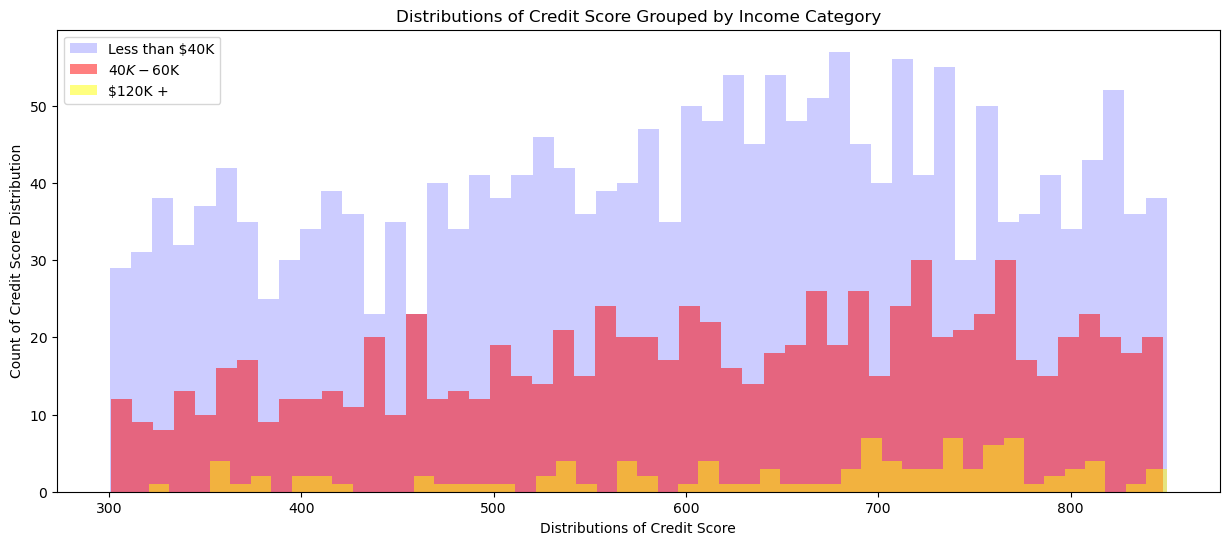

In [151]:
# Set up plot
fig, ax = plt.subplots(figsize=(15,6))

# Plot loan statuses of over 90 days
# can see them overlapping
ax.hist(
    x=less40k["Credit Score"],
    label="Less than $40K",
    bins = 50,
    color="blue",
    alpha=0.2
)
ax.hist(
    x=k40kto60k["Credit Score"],
    label="$40K - $60K",
    bins = 50,
    color="red",
    alpha=0.5
)
ax.hist(
    x=k120K["Credit Score"],
    label="$120K +",
    bins = 50,
    color="yellow",
    alpha=0.5
)
# Customize labels
ax.set_title("Distributions of Credit Score Grouped by Income Category")
ax.set_xlabel("Distributions of Credit Score")
ax.set_ylabel("Count of Credit Score Distribution")
ax.legend();

# Most applicants with bad debt are 

Income category has an impact on the FICO score. Most of the highest income earning customers i.e. 120K+ had the largest FICO score of between 700 - 780. The least income category i.e. Less than 40K had the largest count of the least FICO scores but as well as the highest count of the highest FICO score(could be attributed to the data imbalance). 

# 5.0  Conclusion and Summary

1. From the analysis, the strongest relationship was that of cutomer age and period of relationship with bank at 0.79 while the least related variables were; credit limit and utilization ratio at -0.48. This implies that the lower the credit limit, the higher the credit utilization ratio.
2. Men generally have higher revolving balances per education level with the highest being at Post-Graduate and the lowest at Graduate.

Beneficiaries of this kind of analysis could potentially be banks, insurance companies, mortgage and government agencies.


### Disclaimer: This is a personal data analytics practice project. The views and opinions expressed in this analysis outcome are those of the authors and do not necessarily reflect the official policy or any other party.This article is for informational purposes only; please consult your advisor to determine whether this strategy is right for you.